<a href="https://colab.research.google.com/github/MendesAdriano/CyberNewsClassification/blob/main/Database_analysis_exercise_(CTI_and_HackerNews).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

# DATABASE 1 (CTI) - database compoused by Cyber Threat Intelligence (CTI) sentences labeled under ATT&CK Matrix taxonomy. Dataset (dataset.csv) available in https://github.com/dessertlab/cti-to-mitre-with-nlp/tree/main/data

##Overview

In [ ]:
dfCTI = pd.read_csv('/content/dataset.txt')
dfCTI.info()


In [ ]:

dfCTI.head(10)

,Unnamed: 0,label_tec,label_subtec,tec_name,sentence
0,0,T1003,T1003.008,/etc/passwd and /etc/shadow,Adversaries may attempt to dump the contents o...
1,1,T1003,T1003.008,/etc/passwd and /etc/shadow,Most modern Linux operating systems use a comb...
2,2,T1003,T1003.008,/etc/passwd and /etc/shadow,"By default, /etc/shadow is only readable by th..."
3,3,T1003,T1003.008,/etc/passwd and /etc/shadow,"The Linux utility, unshadow, can be used to co..."
4,4,T1557,T1557.002,ARP Cache Poisoning,Adversaries may poison Address Resolution Prot...
5,5,T1557,T1557.002,ARP Cache Poisoning,This activity may be used to enable follow-on ...
6,6,T1557,T1557.002,ARP Cache Poisoning,The ARP protocol is used to resolve IPv4 addre...
7,7,T1557,T1557.002,ARP Cache Poisoning,Devices in a local network segment communicate...
8,8,T1557,T1557.002,ARP Cache Poisoning,If a networked device does not have the link l...
9,9,T1557,T1557.002,ARP Cache Poisoning,The device with the associated IP address dire...


##Sentences:

In [ ]:
dfCTI['tamanho_texto']=dfCTI['sentence'].apply(lambda x: len(str(x)))
dfCTI.tamanho_texto.describe()

count    12945.000000
mean        99.642410
std         51.478169
min          2.000000
25%         64.000000
50%         88.000000
75%        123.000000
max       1396.000000
Name: tamanho_texto, dtype: float64

In [ ]:
#Are there any duplicated sentence?
dfCTI.loc[dfCTI.sentence.duplicated()]

,Unnamed: 0,label_tec,label_subtec,tec_name,sentence,tamanho_texto


Text(0.5, 1.0, 'Histogram sentence size')

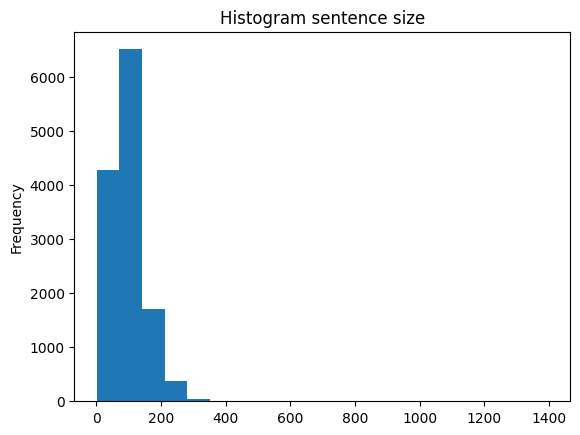

In [ ]:
ax = dfCTI['tamanho_texto'].plot(kind='hist', bins=20)
ax.set_title('Histogram sentence size')


## Labels:

In [ ]:
dfCTI['tec_name'].describe()

count                     12945
unique                      546
top       Ingress Tool Transfer
freq                        340
Name: tec_name, dtype: object

## Considerations:
Multiclass classification. Sentences classified among 546 different categories. One sentence classified only in one category.

Labels: too many. Would be better to classify among less categories. For training purpose, very unbalanced.

Sentences: long right tail on length distribuition. If using this dataset for traininig, would recommend just use  sentences shorter than 200 or 250

# DATABASE 2 (HN) - database compoused by news articles from site thehackernews.com labeled under their taxonomy. Dataset (TheHackerNews_Dataset.xlsx) available at https://github.com/cypher-07/Cybersecurity-News-Article-Dataset/tree/main

##Overview

In [ ]:
dfHN = pd.read_excel('/content/TheHackerNews_Dataset.xlsx')
dfHN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    3742 non-null   object
 1   Link     3742 non-null   object
 2   Article  3742 non-null   object
 3   Label    3742 non-null   object
dtypes: object(4)
memory usage: 117.1+ KB


In [ ]:
dfHN.head(3)

##Articles:

In [ ]:
dfHN['Article'].describe()

count                                                  3742
unique                                                 3224
top       Data breaches and security incidents are a con...
freq                                                      3
Name: Article, dtype: object

In [ ]:
dfHN.duplicated(subset=['Article'],keep=False).value_counts()

False    2726
True     1016
dtype: int64

In [ ]:
dfHN.duplicated(subset=['Article', 'Title','Link'],keep=False).sum()

1016

In [ ]:
#if the sum below == 0 then this dataset is a multilabel classification, meaning, one article has multiple labels..
dfHN.duplicated(subset=['Article', 'Label']).sum()

0

<Axes: ylabel='Frequency'>

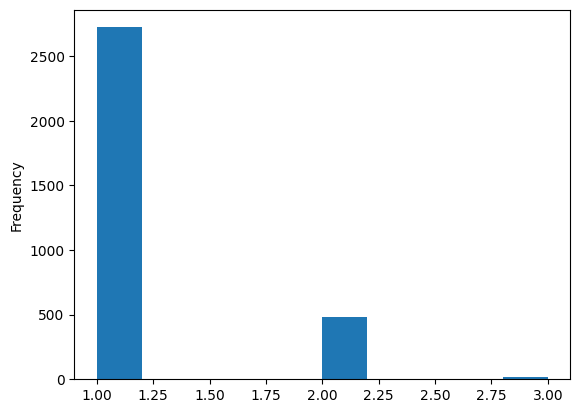

In [ ]:
#how many labels per title?
dfHN.groupby('Title')['Label'].count().plot(kind='hist')

In [ ]:
dfHN['text_size']=dfHN.Article.map(lambda x:len(x))
dfHN['text_size'].describe()

count     3742.000000
mean      2971.236772
std       1333.502269
min        141.000000
25%       2093.000000
50%       2839.500000
75%       3618.500000
max      13209.000000
Name: text_size, dtype: float64

Text(0.5, 1.0, 'Histogram article size')

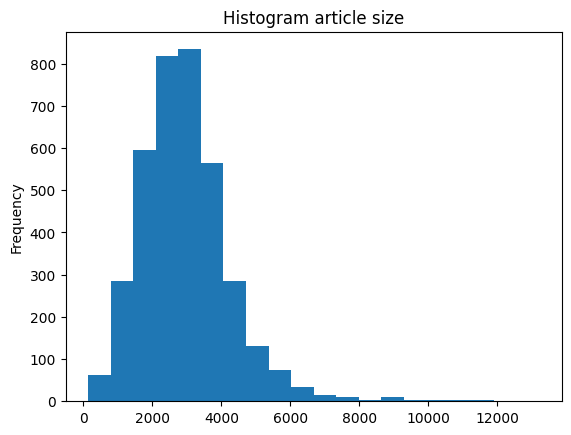

In [ ]:
ax = dfHN['text_size'].plot(kind='hist',bins=20)
ax.set_title('Histogram article size')

##Labels:

In [ ]:
dfHN['Label'].describe()

count              3742
unique                4
top       Vulnerability
freq               1352
Name: Label, dtype: object

<Axes: >

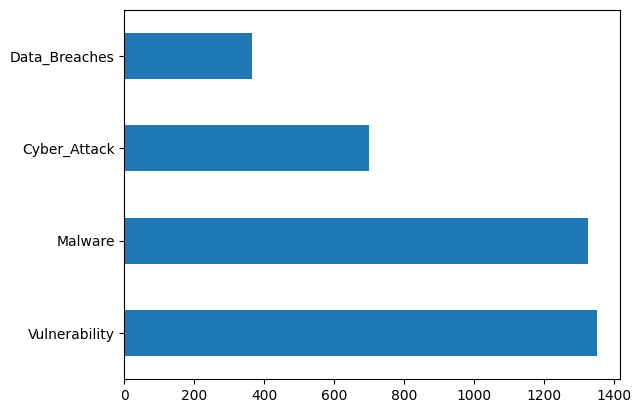

In [ ]:
dfHN['Label'].value_counts().plot(kind='barh')

##Considerations:
Multi label classification. Articles classified from one up to 3 categories among 4.

Labels: Good number of categories, little bit unbalanced.

Articles: sizes are relatively big. Right tail could be discharged over 6000.